# FlightDelayPy

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress


In [20]:
flight_data_df = pd.read_csv("data/T_ONTIME_REPORTING.csv")
flight_data_df

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME
0,2023,1,1,1,7,1/1/2023 0:00,AA,19805,AA,N122US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,1,1,1,7,1/1/2023 0:00,AA,19805,AA,N140AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,1,1,1,7,1/1/2023 0:00,AA,19805,AA,N140AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,1,1,1,7,1/1/2023 0:00,AA,19805,AA,N142AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,1,1,1,7,1/1/2023 0:00,AA,19805,AA,N149AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,2023,1,1,31,2,1/31/2023 0:00,YX,20452,YX,N446YX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6064,2023,1,1,31,2,1/31/2023 0:00,YX,20452,YX,N806MD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6065,2023,1,1,31,2,1/31/2023 0:00,YX,20452,YX,N806MD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6066,2023,1,1,31,2,1/31/2023 0:00,YX,20452,YX,N818MD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flight_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     6068 non-null   int64  
 1   QUARTER                  6068 non-null   int64  
 2   MONTH                    6068 non-null   int64  
 3   DAY_OF_MONTH             6068 non-null   int64  
 4   DAY_OF_WEEK              6068 non-null   int64  
 5   FL_DATE                  6068 non-null   object 
 6   OP_UNIQUE_CARRIER        6068 non-null   object 
 7   OP_CARRIER_AIRLINE_ID    6068 non-null   int64  
 8   OP_CARRIER               6068 non-null   object 
 9   TAIL_NUM                 6068 non-null   object 
 10  OP_CARRIER_FL_NUM        6068 non-null   int64  
 11  ORIGIN_AIRPORT_ID        6068 non-null   int64  
 12  ORIGIN_AIRPORT_SEQ_ID    6068 non-null   int64  
 13  ORIGIN_CITY_MARKET_ID    6068 non-null   int64  
 14  ORIGIN                  

In [4]:
flight_data_df.shape

(6068, 80)

In [5]:
flight_data_df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_

In [6]:
flight_data_df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME
count,6068.0,6068.0,6068.0,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6.068000e+03,6068.000000,...,8.000000e+00,8.000000,8.000000,8.000000,8.000000,0.0,0.0,0.0,0.0,0.0
mean,2023.0,1.0,1.0,16.033619,3.851846,19906.667106,2828.889750,13338.673204,1.333871e+06,32582.165953,...,1.322278e+06,1323.750000,43.375000,39.250000,1511.625000,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.966534,2.067981,410.787760,1628.682736,1611.615406,1.611608e+05,1777.821414,...,2.134966e+05,418.425194,31.034255,33.104812,462.663388,NaN,NaN,NaN,NaN,NaN
min,2023.0,1.0,1.0,1.000000,1.000000,19393.000000,4.000000,10397.000000,1.039707e+06,30194.000000,...,1.069302e+06,811.000000,11.000000,7.000000,934.000000,NaN,NaN,NaN,NaN,NaN
25%,2023.0,1.0,1.0,8.000000,2.000000,19393.000000,1541.000000,11298.000000,1.129806e+06,30466.000000,...,1.107677e+06,976.500000,13.750000,9.500000,1126.500000,NaN,NaN,NaN,NaN,NaN
50%,2023.0,1.0,1.0,16.000000,4.000000,19805.000000,2710.000000,13851.000000,1.385103e+06,33851.000000,...,1.364554e+06,1365.500000,42.000000,35.500000,1492.000000,NaN,NaN,NaN,NaN,NaN
75%,2023.0,1.0,1.0,24.000000,6.000000,20304.000000,4232.000000,14869.000000,1.486903e+06,33851.000000,...,1.509281e+06,1529.250000,70.000000,64.750000,1822.000000,NaN,NaN,NaN,NaN,NaN
max,2023.0,1.0,1.0,31.000000,7.000000,20452.000000,5954.000000,15370.000000,1.537002e+06,35074.000000,...,1.537002e+06,1921.000000,83.000000,83.000000,2207.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
data = flight_data_df[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']]
headers = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']
df1 = pd.DataFrame(data, columns=headers)
df1.head()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY
0,NaN,NaN,NaN,NaN,NaN,NaN
1,64.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,56.0,NaN
3,76.0,0.0,0.0,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Total number of airline brand
airlines=flight_data_df.OP_UNIQUE_CARRIER.unique()
len(airlines)

11

In [17]:
#returns counts of each unique values
value=flight_data_df.OP_UNIQUE_CARRIER.value_counts()
value

OP_UNIQUE_CARRIER
WN    1936
OO    1717
AA     852
DL     490
MQ     398
YX     263
UA     144
OH     132
G4      66
AS      50
F9      20
Name: count, dtype: int64

<Axes: ylabel='OP_UNIQUE_CARRIER'>

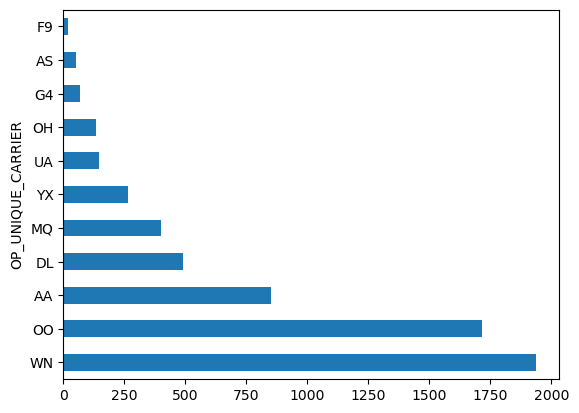

In [27]:
value.plot(kind='barh')

In [26]:
data = {
    "OP_UNIQUE_CARRIER": ["WN", "OO", "AA", "DL", "MQ", "YX", "UA", "OH", "G4", "AS", "F9"],

}

# Dictionary mapping abbreviations to full names
airline_abb = {
    "WN": "Southwest Airlines",
    "OO": "SkyWest Airlines",
    "AA": "American Airlines",
    "DL": "Delta Airlines",
    "MQ": "Envoy Air",
    "YX": "Republic Airline",
    "UA": "United Air Lines",
    "OH": "PSA Airlines",
    "G4": "Allegiant Air",
    "AS": "Alaska Airlines",
    "F9": "Frontier Airlines",
}

# Function to map abbreviations to full names
def map_abbreviations(abbreviation):
    return airline_abb.get(abbreviation, abbreviation)

data["OP_UNIQUE_CARRIER"] = data["OP_UNIQUE_CARRIER"].map(map_abbreviations)


AttributeError: 'list' object has no attribute 'map'